In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [4]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [5]:
df['DRK_YN'] = df['DRK_YN'].map({'Y': 1, 'N': 0})

C:\Users\ketoan\AppData\Local\Temp\ipykernel_17376\1988319266.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


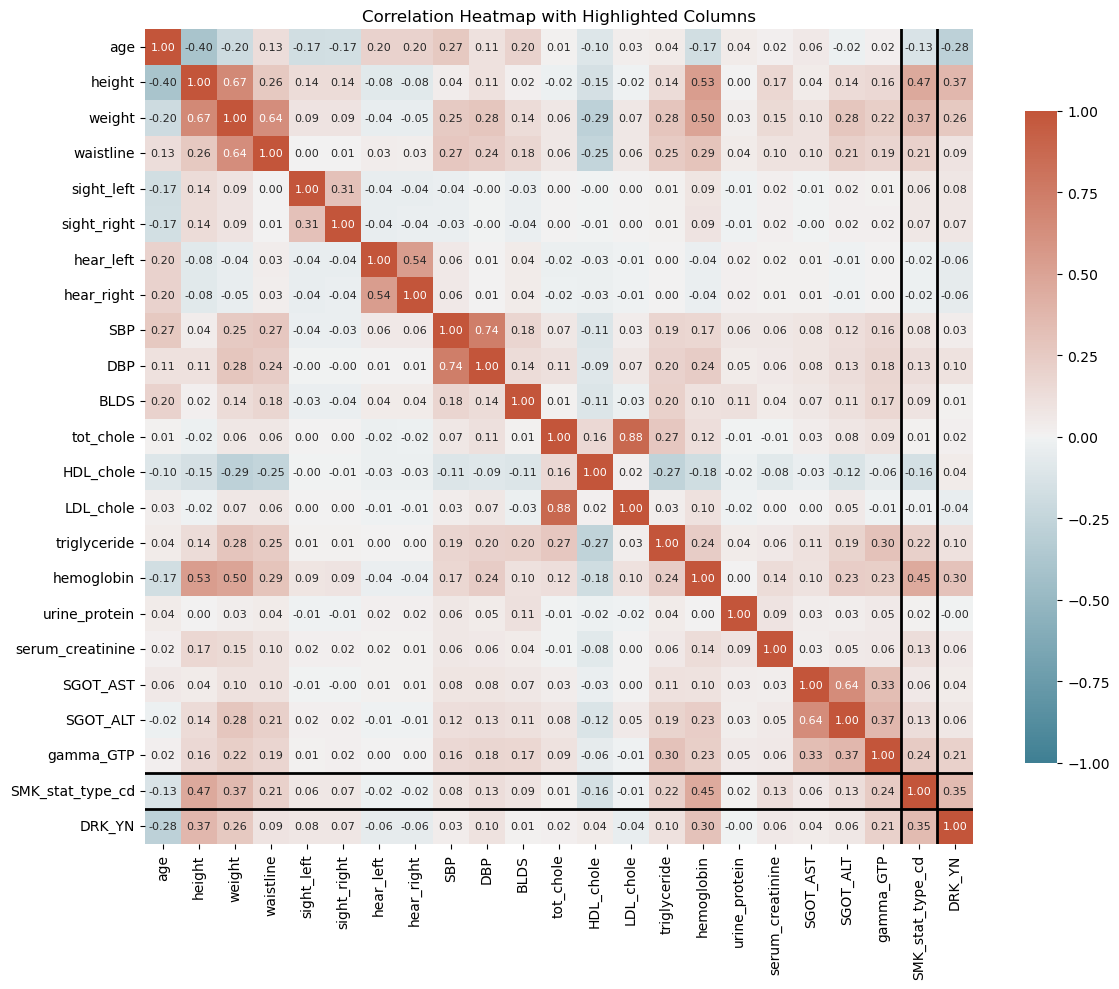

In [6]:
correlation_matrix = df.corr()

# Specify columns to highlight
highlight_cols = ['DRK_YN', 'SMK_stat_type_cd']

# Create a larger heatmap with adjusted font size
plt.figure(figsize=(12, 10))

# Define custom color palette for the heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap with custom colors for highlighted columns
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, fmt=".2f", annot_kws={"size": 8},
            cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)

# Highlight columns by drawing lines around them
for i in range(len(correlation_matrix.columns)):
    if correlation_matrix.columns[i] in highlight_cols:
        plt.axhline(i, color='k', linewidth=2)
        plt.axvline(i, color='k', linewidth=2)

plt.title('Correlation Heatmap with Highlighted Columns')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [7]:
correlation_threshold = 0.1
SMK_features = []
for feature in correlation_matrix.columns:
    if feature != 'SMK_stat_type_cd' and (correlation_matrix[feature]['SMK_stat_type_cd'] > correlation_threshold or
                                correlation_matrix[feature]['SMK_stat_type_cd'] < -correlation_threshold):
        SMK_features.append(feature)

print("Correlated features with 'SMK_stat_type_cd':")
print(SMK_features)

Correlated features with 'SMK_stat_type_cd':
['age', 'height', 'weight', 'waistline', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_ALT', 'gamma_GTP', 'DRK_YN']


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


In [9]:
import pandas as pd

def remove_outliers_iqr(df, column):
    """
    Loại bỏ outliers từ một cột của DataFrame sử dụng phương pháp IQR.

    Parameters:
    - df: DataFrame
    - column: str, tên cột cần loại bỏ outliers

    Returns:
    - DataFrame mới sau khi loại bỏ outliers
    """
    # Lấy dữ liệu từ cột cần xử lý
    data = df[column]

    # Tính phân vị 25% và 75%
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # Tính khoảng tứ phân vị (IQR)
    IQR = Q3 - Q1

    # Xác định ranh giới trên và dưới để xác định outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Lọc các giá trị nằm ngoài ranh giới
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return filtered_df

# Đọc dữ liệu từ CSV file
df = pd.read_csv("smoking_driking_dataset_Ver01.csv", encoding="ISO-8859-1")

# Chọn cột cần loại bỏ outliers (ví dụ: "your_column_name")
column_name = "your_column_name"


In [10]:
df = remove_outliers_iqr(df, 'age')
df = remove_outliers_iqr(df, 'height')
df = remove_outliers_iqr(df, 'weight')
df = remove_outliers_iqr(df, 'waistline')
df = remove_outliers_iqr(df, 'sight_left')
df = remove_outliers_iqr(df, 'sight_right')
df = remove_outliers_iqr(df, 'hear_right')
df = remove_outliers_iqr(df, 'hear_left')
df = remove_outliers_iqr(df, 'SBP')
df = remove_outliers_iqr(df, 'DBP')
df = remove_outliers_iqr(df, 'BLDS')
df = remove_outliers_iqr(df, 'tot_chole')
df = remove_outliers_iqr(df, 'HDL_chole')
df = remove_outliers_iqr(df, 'LDL_chole')
df = remove_outliers_iqr(df, 'triglyceride')
df = remove_outliers_iqr(df, 'hemoglobin')
df = remove_outliers_iqr(df, 'urine_protein')
df = remove_outliers_iqr(df, 'serum_creatinine')
df = remove_outliers_iqr(df, 'SGOT_AST')
df = remove_outliers_iqr(df, 'SGOT_ALT')
df = remove_outliers_iqr(df, 'gamma_GTP')

In [11]:
df['age'] = pd.cut (df['age'], bins = [20,35,45,60,85])

df['height'] = pd.cut (df['height'], bins = [130,155,160,170,190])

df['weight'] = pd.cut (df['weight'], bins = [35,50,60,65,90])

df['waistline'] = pd.cut (df['waistline'], bins = [55.3,72.0,78.0,84.0,104.0])

df['sight_left'] = pd.cut (df['sight_left'], bins = [0.3,0.8,1.0,1.2,1.7])

df['sight_right'] = pd.cut (df['sight_right'], bins = [0.3,0.8,1.0,1.2,1.7])

df['hear_left'] = pd.cut (df['hear_left'], bins = [0,1,2])

df['hear_right'] = pd.cut (df['hear_right'], bins = [0,1,2])

df['SBP'] = pd.cut (df['SBP'], bins = [83.0,110.0,119.0,128.0,157.0])

df['DBP'] = pd.cut (df['DBP'], bins = [55.0,68.0,74.0,80.0,95.0])

df['BLDS'] = pd.cut (df['BLDS'], bins = [68.0,87.0,93.0,100.0,119.0])

df['tot_chole'] = pd.cut (df['tot_chole'], bins = [102.0,168.0,190.0,213.0,281.0])

df['HDL_chole'] = pd.cut (df['HDL_chole'], bins = [20.0,49.0,58.0,68.0,94.0])

df['LDL_chole'] = pd.cut (df['LDL_chole'], bins = [28.0,91.0,111.0,133.0,196.0])

df['triglyceride'] = pd.cut (df['triglyceride'], bins = [1.0,65.0,90.0,124.0,227.0])

df['hemoglobin'] = pd.cut (df['hemoglobin'], bins = [9.9,13.0,13.9,15.0,18.2])

df['serum_creatinine'] = pd.cut (df['serum_creatinine'], bins = [0.3,0.7,0.8,0.9,1.4])

df['SGOT_AST'] = pd.cut (df['SGOT_AST'], bins = [8.0,18.0,21.0,24.0,35.0])

df['SGOT_ALT'] = pd.cut (df['SGOT_ALT'], bins = [1.0,13.0,17.0,22.0,38.0])

df['gamma_GTP'] = pd.cut (df['gamma_GTP'], bins = [1.0,14.0,18.0,25.0,44.0])

In [12]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["sex"] = lb_make.fit_transform(df["sex"])
df["DRK_YN"] = lb_make.fit_transform(df["DRK_YN"])
df["height"] = lb_make.fit_transform(df["height"])
df["weight"] = lb_make.fit_transform(df["weight"])
df["waistline"] = lb_make.fit_transform(df["waistline"])
df["sight_left"] = lb_make.fit_transform(df["sight_left"])
df["sight_right"] = lb_make.fit_transform(df["sight_right"])
df["LDL_chole"] = lb_make.fit_transform(df["LDL_chole"])
df["HDL_chole"] = lb_make.fit_transform(df["HDL_chole"])
df["tot_chole"] = lb_make.fit_transform(df["tot_chole"])
df["BLDS"] = lb_make.fit_transform(df["BLDS"])
df["DBP"] = lb_make.fit_transform(df["DBP"])
df["SBP"] = lb_make.fit_transform(df["SBP"])
df["hear_right"] = lb_make.fit_transform(df["hear_right"])
df["hear_left"] = lb_make.fit_transform(df["hear_left"])
df["age"] = lb_make.fit_transform(df["age"])
df["gamma_GTP"] = lb_make.fit_transform(df["gamma_GTP"])
df["SGOT_ALT"] = lb_make.fit_transform(df["SGOT_ALT"])
df["SGOT_AST"] = lb_make.fit_transform(df["SGOT_AST"])
df["serum_creatinine"] = lb_make.fit_transform(df["serum_creatinine"])
df["hemoglobin"] = lb_make.fit_transform(df["hemoglobin"])
df["triglyceride"] = lb_make.fit_transform(df["triglyceride"])
df["SMK_stat_type_cd"] = lb_make.fit_transform(df["SMK_stat_type_cd"])
df["DRK_YN"] = lb_make.fit_transform(df["DRK_YN"])

In [13]:
features = ['age', 'height', 'weight', 'waistline', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_ALT', 'gamma_GTP']
target = ['SMK_stat_type_cd']
X = df[features]
y = df[target]
print(X)
print(y)

        age  height  weight  waistline  DBP  HDL_chole  triglyceride  \
0         0       2       3          3    2          0             2   
1         0       3       3          3    3          1             2   
3         2       3       3          3    3          3             2   
4         2       2       1          2    3          2             2   
6         1       0       1          0    0          2             1   
...     ...     ...     ...        ...  ...        ...           ...   
991339    3       2       1          1    2          1             2   
991340    2       0       0          1    1          0             3   
991341    1       3       3          3    2          0             3   
991342    0       2       3          3    3          0             0   
991344    0       3       1          0    1          0             0   

        hemoglobin  serum_creatinine  SGOT_ALT  gamma_GTP  
0                3                 3         3          3  
1              

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

        age  height  weight  waistline  DBP  HDL_chole  triglyceride  \
736792    0       2       3          2    3          2             2   
333388    4       1       0          0    1          3             0   
917607    1       2       2          0    2          1             1   
872966    1       2       2          2    2          2             0   
775578    0       3       3          3    2          2             3   
...     ...     ...     ...        ...  ...        ...           ...   
989693    2       1       1          0    2          1             3   
951680    0       2       2          0    0          1             0   
398527    2       0       1          1    1          2             3   
54652     2       0       1          2    0          0             3   
512986    0       0       0          0    1          2             1   

        hemoglobin  serum_creatinine  SGOT_ALT  gamma_GTP  
736792           3                 2         3          1  
333388         

In [15]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion = "entropy",
random_state = 100,
max_depth = 4,
min_samples_leaf = 10)

In [16]:
model = model.fit(X_train,y_train)

[Text(0.5, 0.9, 'x[1] <= 1.5\nentropy = 1.223\nsamples = 462366\nvalue = [314569, 68695, 79102]'),
 Text(0.25, 0.7, 'x[7] <= 1.5\nentropy = 0.66\nsamples = 258575\nvalue = [226817, 15822, 15936]'),
 Text(0.125, 0.5, 'x[8] <= 2.5\nentropy = 0.415\nsamples = 187471\nvalue = [175155, 6220, 6096]'),
 Text(0.0625, 0.3, 'x[1] <= 0.5\nentropy = 0.377\nsamples = 174426\nvalue = [164309, 4794, 5323]'),
 Text(0.03125, 0.1, 'entropy = 0.312\nsamples = 121310\nvalue = [115783, 2488, 3039]'),
 Text(0.09375, 0.1, 'entropy = 0.511\nsamples = 53116\nvalue = [48526, 2306, 2284]'),
 Text(0.1875, 0.3, 'x[1] <= 0.5\nentropy = 0.812\nsamples = 13045\nvalue = [10846, 1426, 773]'),
 Text(0.15625, 0.1, 'entropy = 0.525\nsamples = 8281\nvalue = [7530, 474, 277]'),
 Text(0.21875, 0.1, 'entropy = 1.168\nsamples = 4764\nvalue = [3316, 952, 496]'),
 Text(0.375, 0.5, 'x[1] <= 0.5\nentropy = 1.12\nsamples = 71104\nvalue = [51662, 9602, 9840]'),
 Text(0.3125, 0.3, 'x[8] <= 1.5\nentropy = 0.727\nsamples = 37406\nvalue

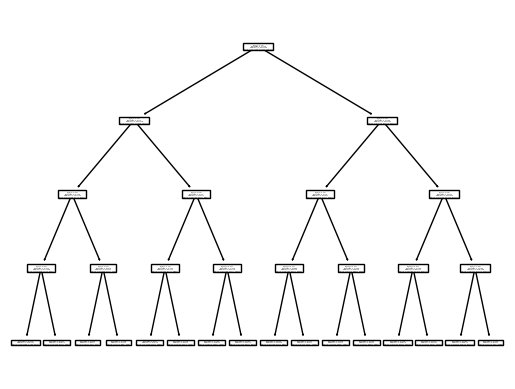

In [17]:
tree.plot_tree(model)

In [18]:

print(tree.export_text(model,show_weights = True))

|--- feature_1 <= 1.50
|   |--- feature_7 <= 1.50
|   |   |--- feature_8 <= 2.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- weights: [115783.00, 2488.00, 3039.00] class: 0
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- weights: [48526.00, 2306.00, 2284.00] class: 0
|   |   |--- feature_8 >  2.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- weights: [7530.00, 474.00, 277.00] class: 0
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- weights: [3316.00, 952.00, 496.00] class: 0
|   |--- feature_7 >  1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_8 <= 1.50
|   |   |   |   |--- weights: [24939.00, 1029.00, 1555.00] class: 0
|   |   |   |--- feature_8 >  1.50
|   |   |   |   |--- weights: [7198.00, 1413.00, 1272.00] class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_10 <= 1.50
|   |   |   |   |--- weights: [9503.00, 1627.00, 1442.00] class: 0
|   |   |   |--- feature_10 >  1.50
|   |   |   |   |--- weights: [10022.00, 5533.00

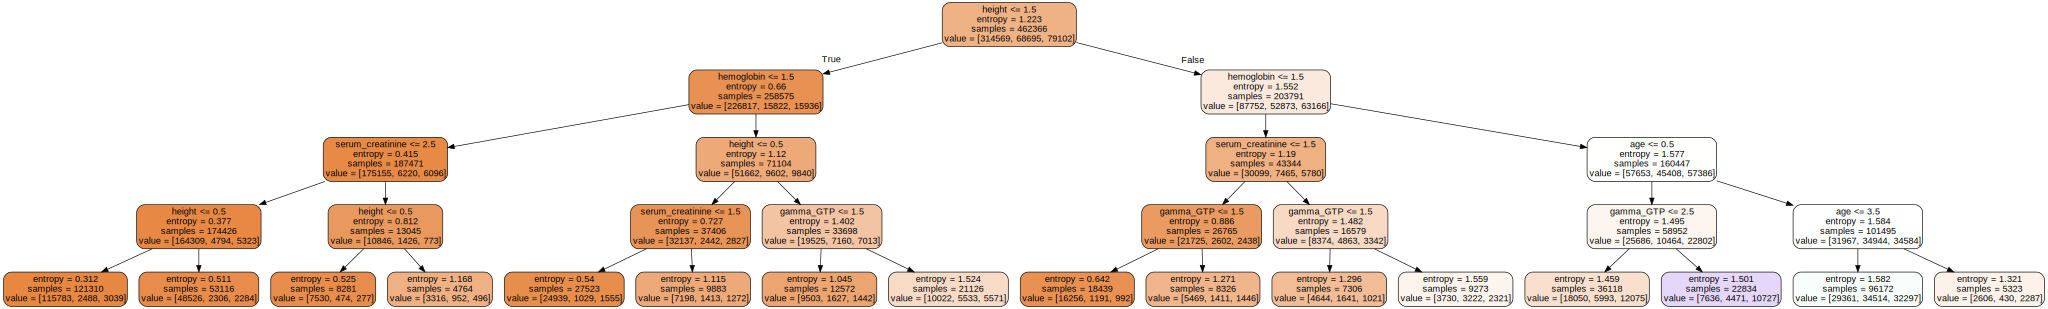

In [19]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("df")
dot_data = tree.export_graphviz(model,out_file = None,
feature_names=features,
filled =True,
rounded = True )
graph = graphviz.Source(dot_data)
graph

In [20]:
y_pred = model.predict(X_test)
print("Giá trị nhãn mô hình dự đoán được:\n " ,y_pred)

Giá trị nhãn mô hình dự đoán được:
  [1 0 1 ... 0 0 0]


Confusion Matrix: 
 [[69648  7201  1908]
 [ 7331  8522  1137]
 [ 9127  7998  2720]]


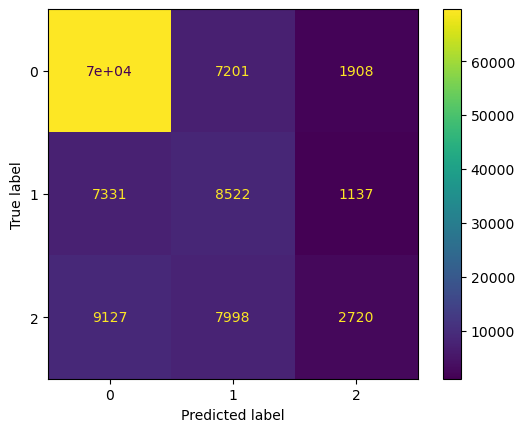

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print(ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred)).plot())

In [22]:
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy :  69.97889127275243


In [23]:
from sklearn.metrics import classification_report

#Ma trận độ chính xác mô hình
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84     78757
           1       0.36      0.50      0.42     16990
           2       0.47      0.14      0.21     19845

    accuracy                           0.70    115592
   macro avg       0.55      0.51      0.49    115592
weighted avg       0.68      0.70      0.67    115592



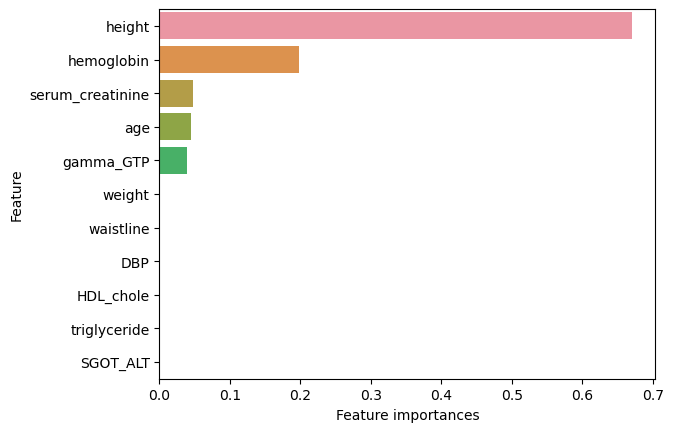

In [24]:
import seaborn as sns

import matplotlib.pyplot as plt
importances = model.feature_importances_
features_importances = pd.Series(importances, index = X.columns).sort_values(ascending = False)
sns.barplot (x = features_importances, y = features_importances.index)
plt.xlabel ('Feature importances')
plt.ylabel ('Feature')
plt.show()

In [25]:
new_ps=pd.DataFrame({'age': [20], 'height': [180],'weight':[75],'waistline':[88],'DBP':[91],'HDL_chole':[54],'triglyceride':[232],'hemoglobin':[13.1],'serum_creatinine':[1],'SGOT_ALT':[40],'gamma_GTP':[26]})

In [26]:
smk_pred = model.predict(new_ps)
print(smk_pred)

[0]


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

d:\anaconda\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.6918125821856184


In [29]:
from sklearn.metrics import classification_report

#Ma trận độ chính xác mô hình
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83     78757
           1       0.36      0.29      0.32     16990
           2       0.41      0.37      0.39     19845

    accuracy                           0.69    115592
   macro avg       0.52      0.50      0.51    115592
weighted avg       0.67      0.69      0.68    115592

